### Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
              [1, 3]])
print(m)

In [8]:
import numpy as np
from numpy import linalg as la

In [4]:
a = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])   ###  Диагональная, ортогональная

at = a.transpose()
a.dot(at)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [5]:
b = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])   ### Верхнетреугольная, ортогональная

bt = b.transpose()
b.dot(bt)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [6]:
c = np.array([[1, 2], [1, 3]])   ### Матрица, у которой определитель = 1, и все элементы не равны 0

np.linalg.det(c)

1.0

In [20]:
m = np.array([[2, 2], [1, 3]])   ### Найдите собственные значения и собственные вектора матрицы

w, v = la.eig(m)
print(f'Собственные значения матрицы: {w}\nСобственные векторы матрицы: {v}')

Собственные значения матрицы: [1. 4.]
Собственные векторы матрицы: [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


### Уровень 1:
Найдите спектральное разложение матрицы:
   
m = np.array([[1, 2],   
              [2,3]])   
print(m)   

In [30]:
m = np.array([[1, 2], [2, 3]])
print(m)

[[1 2]
 [2 3]]


Спектральное разложение:

А = ST D S

D - диагональная матрица из собств значений А

S - ортогональная матрица собств векторов А

ST - транспонированная S

In [31]:
v1, w1 = np.linalg.eig(m)  ### Определим собственные значения и вектора матрицы

In [32]:
D = np.diag(v1)  ### Диагональная матрица из собственных значений
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [33]:
S = w1.T  ### Ортогональная матрица
S

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [34]:
np.dot(np.dot(S.T, D), S) ### Проверим разложение

array([[1., 2.],
       [2., 3.]])

In [35]:
from sklearn.datasets import load_digits
from sklearn import decomposition
from sklearn.metrics import mean_squared_error

In [36]:
digits = load_digits()
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [37]:
res = []
for i in range(1,64):
    pca = decomposition.PCA(n_components = i)
    X_red= pca.fit_transform(X)
    X_new = pca.inverse_transform(X_red) 
    a = mean_squared_error(X, X_new)
    res.append(a)
print(res)

[15.97767846223538, 13.421012200761503, 11.206800697137187, 9.627986407135156, 8.542447630970715, 7.619390866574089, 6.809164147550475, 6.121796659985257, 5.492330145309384, 4.914315479459936, 4.468946564637585, 4.0423367611515015, 3.700306044192171, 3.367420267598097, 3.091878328391025, 2.827336804028408, 2.5796882404771484, 2.3454066672338953, 2.154405869341798, 1.9845016090419407, 1.8173720616916549, 1.667840805472903, 1.523613340387156, 1.3878888537489478, 1.2575179925145283, 1.145500057611907, 1.0372491933818169, 0.9405897315060152, 0.8489244924815201, 0.7682328534848993, 0.6979713828063034, 0.6316441074264751, 0.5684396725861056, 0.5068578479645166, 0.4489718618514343, 0.39382026827819777, 0.34564884616516267, 0.3028926279681543, 0.2611633846866913, 0.22147132414311005, 0.18581949479366316, 0.1560354176184751, 0.12765800399303623, 0.10126700469810238, 0.07937337936466579, 0.059193695218972026, 0.041095425543330996, 0.026553209917773213, 0.01609261877524608, 0.008502076113108128, 

Text(0, 0.5, 'среднеквадратичная ошибка')

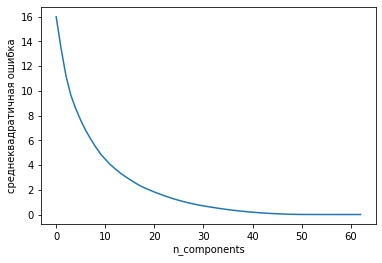

In [42]:
import matplotlib.pyplot as plt
plt.plot(res)
plt.xlabel('n_components')
plt.ylabel('среднеквадратичная ошибка')